In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop(['Unnamed: 0', 'Year', 'Month', 'Day', 'Quarter', 'Week'], axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82722 entries, 0 to 82721
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DOT_ID_Reporting_Airline         82722 non-null  int64  
 1   Flight_Number_Reporting_Airline  82722 non-null  int64  
 2   OriginAirportID                  82722 non-null  int64  
 3   OriginWac                        82722 non-null  int64  
 4   DestAirportID                    82722 non-null  int64  
 5   DestWac                          82722 non-null  int64  
 6   CRSDepTime                       82722 non-null  int64  
 7   DepTime                          82722 non-null  float64
 8   DepDelayMinutes                  82722 non-null  float64
 9   CRSArrTime                       82722 non-null  int64  
 10  ArrTime                          82722 non-null  float64
 11  ArrDelayMinutes                  82722 non-null  float64
 12  Diverted          

In [ ]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop(['Unnamed: 0', 'Year', 'Month', 'Day', 'Quarter', 'Week'], axis=1)

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects',
                         'DepTime',
                         'DepDelayMinutes',
                         'ArrTime',
                         'ArrDelayMinutes',
                         'Diverted',
                         'ActualElapsedTime',
                         'AirTime',
                         'CarrierDelay',
                         'WeatherDelay',
                         'NASDelay',
                         'SecurityDelay',
                         'LateAircraftDelay',
                         'CancellationCode_encoded',
                         'tavg',
                         'tmin',
                         'tmax',
                         'prcp',
                         'wdir',
                         'wspd',
                         'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects',
                       'DepTime',
                       'DepDelayMinutes',
                       'ArrTime',
                       'ArrDelayMinutes',
                       'Diverted',
                       'ActualElapsedTime',
                       'AirTime',
                       'CarrierDelay',
                       'WeatherDelay',
                       'NASDelay',
                       'SecurityDelay',
                       'LateAircraftDelay',
                       'CancellationCode_encoded',
                       'tavg',
                       'tmin',
                       'tmax',
                       'prcp',
                       'wdir',
                       'wspd',
                       'pres'], axis = 1)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

columns = y_train.columns
dtypes = {'tavg':'float64',
          'tmin':'float64',
          'tmax':'float64',
          'prcp':'float64',
          'wdir':'float64',
          'wspd':'float64',
          'pres':'float64'}

# Creating empty dataframe to store predictions
y_pred = pd.DataFrame(columns=columns).astype(dtypes)

for col in y_train.columns:
  # y_train1 = y_train[col]
  gbr.fit(x_train, y_train[col])
  # Make predictions
  y_pred[col] = gbr.predict(x_test)

In [ ]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted',
                    'ActualElapsedTime',
                    'AirTime',
                    'CarrierDelay',
                    'WeatherDelay',
                    'NASDelay',
                    'SecurityDelay',
                    'LateAircraftDelay',
                    'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted',
                  'ActualElapsedTime',
                  'AirTime',
                  'CarrierDelay',
                  'WeatherDelay',
                  'NASDelay',
                  'SecurityDelay',
                  'LateAircraftDelay',
                  'CancellationCode_encoded']]

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

columns = y_train.columns
dtypes = {'Diverted':'int64',
          'ActualElapsedTime':'float64',
          'AirTime':'float64',
          'CarrierDelay':'float64',
          'WeatherDelay':'float64',
          'NASDelay':'float64',
          'SecurityDelay':'float64',
          'LateAircraftDelay':'float64',
          'CancellationCode_encoded':'int64'}

# Creating empty dataframe to store predictions
y_pred = pd.DataFrame(columns=columns).astype(dtypes)

for col in y_train.columns:
  # y_train1 = y_train[col]
  gbr.fit(x_train, y_train[col])
  # Make predictions
  y_pred[col] = gbr.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1508.7689626205258
R^2 Score: 0.436052634964609


In [ ]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

columns = y_train.columns
dtypes = {'DepTime':'float64', 'DepDelayMinutes':'float64', 'ArrTime':'float64'}

# Creating empty dataframe to store predictions
y_pred = pd.DataFrame(columns=columns).astype(dtypes)

for col in y_train.columns:
  # y_train1 = y_train[col]
  gbr.fit(x_train, y_train[col])
  # Make predictions
  y_pred[col] = gbr.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 99717.25188132613
R^2 Score: 0.3838833943329964


In [ ]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

In [ ]:
y_train

,ArrDelayMinutes
0,47.0
1,114.0
2,22.0
3,19.0
4,22.0
...,...
82717,16.0
82718,81.0
82719,79.0
82720,98.0


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)
y_train_arr = y_train.values
gbr.fit(x_train, y_train_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200,
                          random_state=42)

In [ ]:
# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 12156.344601128858
R^2 Score: -0.0590284450532752


[0.00000000e+00 1.41620259e-06 7.20172211e-06 0.00000000e+00
 4.45622819e-06 3.90396682e-06 3.48911507e-06 6.48539233e-06
 6.05783998e-06 0.00000000e+00 2.32066751e-07 0.00000000e+00
 7.98423911e-06 7.52302015e-07 8.53632554e-05 0.00000000e+00
 1.13014058e-04 1.09522555e-04 5.16350407e-06 8.23974699e-06
 1.24296385e-05 1.88085558e-05 1.16051319e-06 0.00000000e+00
 6.69845557e-07 0.00000000e+00 1.68494538e-05 7.08777170e-06
 1.07452257e-03 1.04228093e-04 1.24181974e-02 0.00000000e+00
 9.73414036e-04 0.00000000e+00 2.80038246e-04 9.84724386e-01
 4.92579407e-06]


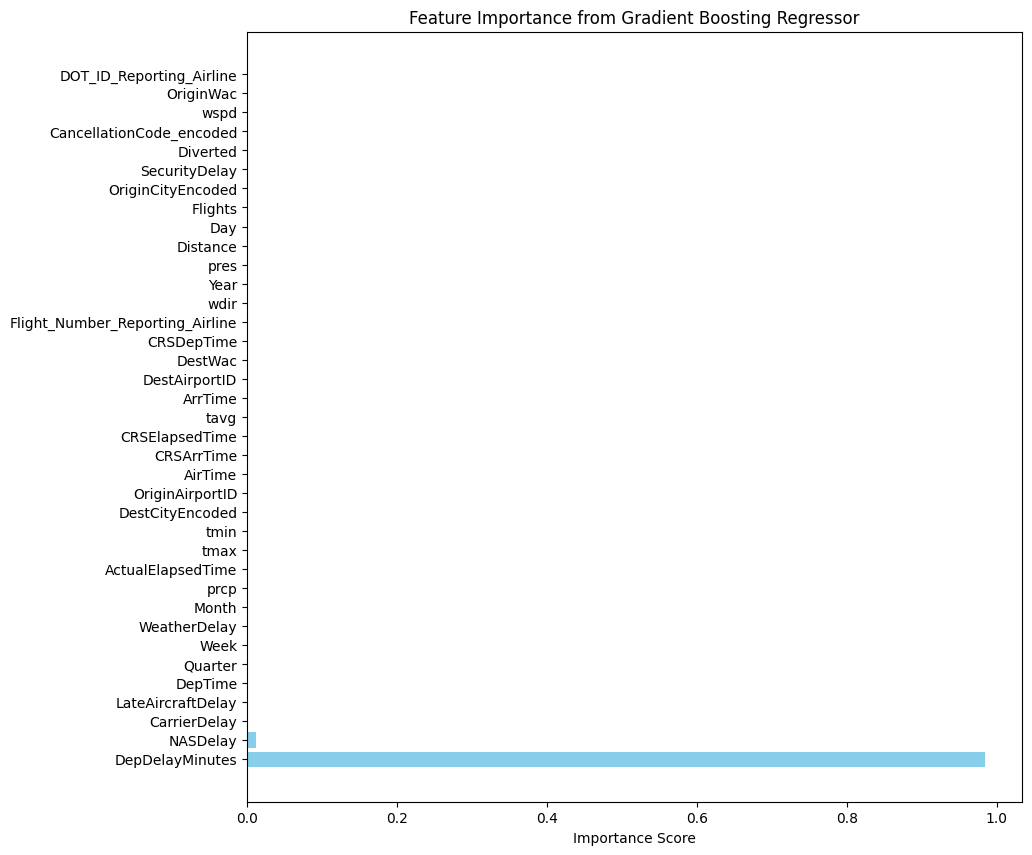

In [ ]:
importances = gbr.feature_importances_
print(importances)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects',
                         'DepTime',
                         'DepDelayMinutes',
                         'ArrTime',
                         'ArrDelayMinutes',
                         'Diverted',
                         'ActualElapsedTime',
                         'AirTime',
                         'CarrierDelay',
                         'WeatherDelay',
                         'NASDelay',
                         'SecurityDelay',
                         'LateAircraftDelay',
                         'CancellationCode_encoded',
                         'tavg',
                         'tmin',
                         'tmax',
                         'prcp',
                         'wdir',
                         'wspd',
                         'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects',
                       'DepTime',
                       'DepDelayMinutes',
                       'ArrTime',
                       'ArrDelayMinutes',
                       'Diverted',
                       'ActualElapsedTime',
                       'AirTime',
                       'CarrierDelay',
                       'WeatherDelay',
                       'NASDelay',
                       'SecurityDelay',
                       'LateAircraftDelay',
                       'CancellationCode_encoded',
                       'tavg',
                       'tmin',
                       'tmax',
                       'prcp',
                       'wdir',
                       'wspd',
                       'pres'], axis = 1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

columns = y_train.columns
dtypes = {'tavg':'float64',
          'tmin':'float64',
          'tmax':'float64',
          'prcp':'float64',
          'wdir':'float64',
          'wspd':'float64',
          'pres':'float64'}

# Creating empty dataframe to store predictions
y_pred = pd.DataFrame(columns=columns).astype(dtypes)

for col in y_train.columns:
  # y_train1 = y_train[col]
  # gbr.fit(x_train, y_train[col])
  random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  random_search.fit(x_train, y_train[col])
  best_params = random_search.best_params_
  best_model = random_search.best_estimator_
  # Make predictions
  y_pred[col] = best_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
400 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 659, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/skle

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted',
                    'ActualElapsedTime',
                    'AirTime',
                    'CarrierDelay',
                    'WeatherDelay',
                    'NASDelay',
                    'SecurityDelay',
                    'LateAircraftDelay',
                    'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted',
                  'ActualElapsedTime',
                  'AirTime',
                  'CarrierDelay',
                  'WeatherDelay',
                  'NASDelay',
                  'SecurityDelay',
                  'LateAircraftDelay',
                  'CancellationCode_encoded']]

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

columns = y_train.columns
dtypes = {'Diverted':'int64',
          'ActualElapsedTime':'float64',
          'AirTime':'float64',
          'CarrierDelay':'float64',
          'WeatherDelay':'float64',
          'NASDelay':'float64',
          'SecurityDelay':'float64',
          'LateAircraftDelay':'float64',
          'CancellationCode_encoded':'int64'}

# Creating empty dataframe to store predictions
y_pred = pd.DataFrame(columns=columns).astype(dtypes)

for col in y_train.columns:
  # y_train1 = y_train[col]
  # gbr.fit(x_train, y_train[col])
  random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  random_search.fit(x_train, y_train[col])
  best_params = random_search.best_params_
  best_model = random_search.best_estimator_
  # Make predictions
  y_pred[col] = best_model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

In [ ]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

columns = y_train.columns
dtypes = {'DepTime':'float64', 'DepDelayMinutes':'float64', 'ArrTime':'float64'}

# Creating empty dataframe to store predictions
y_pred = pd.DataFrame(columns=columns).astype(dtypes)

for col in y_train.columns:
  # y_train1 = y_train[col]
  # gbr.fit(x_train, y_train[col])
  random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  random_search.fit(x_train, y_train[col])
  best_params = random_search.best_params_
  best_model = random_search.best_estimator_
  # Make predictions
  y_pred[col] = best_model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

In [ ]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

In [ ]:
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

In [ ]:
importances = gbr.feature_importances_
print(importances)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()